<a href="https://colab.research.google.com/github/AbhishekGit23/Machine-Learning/blob/main/MachineLearningLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kmeans Clustering Algorithm

In [ ]:
#Step 1 : Reading and Understanding Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("/content/OnlineRetail.csv", encoding = 'unicode_escape')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
dataset.shape

(541909, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# data cleaning


In [ ]:
dataset.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
dataset['CustomerID']=dataset['CustomerID'].fillna(dataset['CustomerID'].mean())

In [ ]:
dataset['Amount'] = dataset['UnitPrice'] * dataset['Quantity'];

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
dataset.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Amount            0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
 8   Amount       541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
dataset['CustomerID']=dataset['CustomerID'].astype('str')

In [ ]:
dataset1 = dataset.groupby('CustomerID')['Amount'].sum()
dataset1.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [ ]:
x = dataset.iloc[:,[6,8]].values

In [ ]:
# dataset1 = dataset1.reset_index()
# dataset1.head()

[1272382835642.3706, 522514261951.3856, 211078800007.73987, 160498114339.1109, 123191466390.20761, 93019290323.22394, 66432779566.79643, 53976707707.71823, 45157538862.598, 38435308438.34847]
KMeans(n_clusters=10, random_state=0)


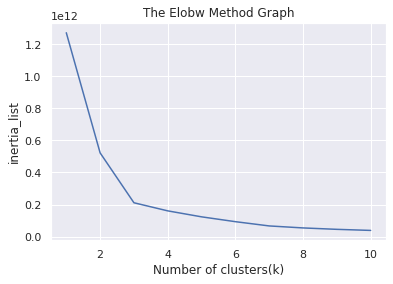

In [ ]:
from sklearn.cluster import KMeans
inertia_list = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(x)
  inertia_list.append(kmeans.inertia_)
print(inertia_list)
print(kmeans.fit(x))
plt.plot(range(1, 11), inertia_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('inertia_list')
plt.show()


In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 0)
y_predict= kmeans.fit_predict(x)

In [ ]:
y_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

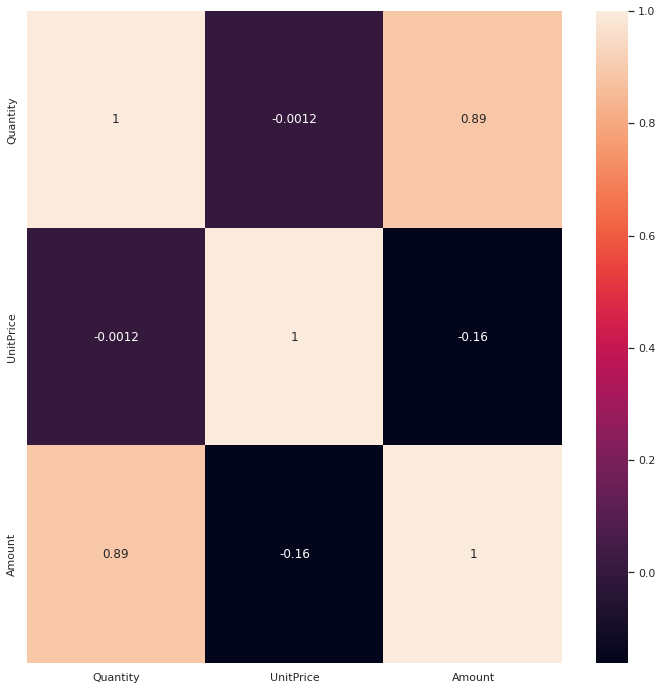

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True) #it checks the linear corellations between the functions
plt.show()

In [ ]:
#visulaizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100 , c = 'blue', label = 'Cluster 1') #for first cluster  s means size
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid')
plt.title('Clusters of customers')


plt.legend(bbox_to_anchor=(1.5,0))
plt.show()

KeyboardInterrupt: ignored

In [ ]:
import seaborn as sns

In [ ]:
#sns.boxplot(x=dataset['Cluster_Id'], y=dataset['Amount'], data=x)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scalar = StandardScaler()
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpecialClustering
# from sklearn.mixture import GaussianMatrix
# from sklearn.metrics import silhouette_samples, silhouette_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn import tree
# from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/Customer Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.drop(columns = ['CUST_ID'],axis = 1, inplace = True)

In [ ]:
# plt.figure(figsize = (30,40))
# for i ,col in enumerate(df.columns):
#   if df[col].dtype != 'object':
#     ax = plt.subplot(9,2,i+1)
#     sns.kdeplot(df[col],ax = ax) #kernal density estimator
#     plt.xlabel(col)
# plt.show()

In [ ]:
# plt.figure(figsize = (10,60))
# for i in range(0,17):
#   ax = plt.subplot(17,1,i+1)
#   sns.distplot(df[df.columns[i]], kde_kws = {'color':'b','bw': 0.1, 'lw':3, 'label': 'KDE'},hist_kws={'color':'g'})
#   plt.title(df.columns[i])
# plt.tight_layout()
# plt.show()

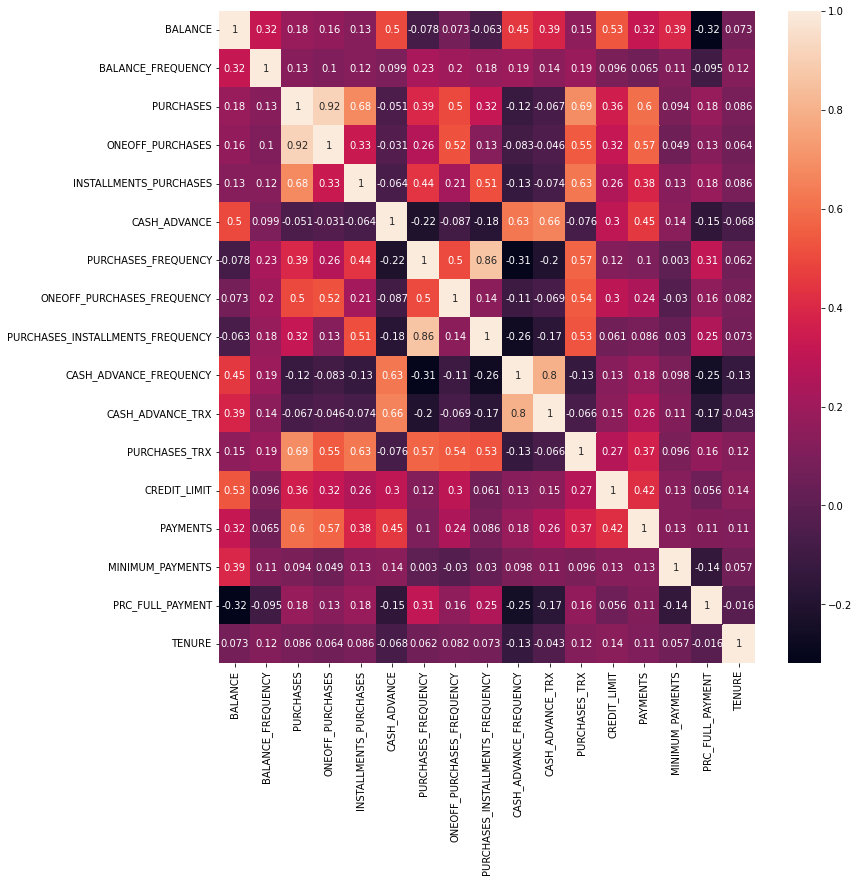

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True) #it checks the linear corellations between the functions
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scalar = StandardScaler()
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpecialClustering
# from sklearn.mixture import GaussianMatrix
# from sklearn.metrics import silhouette_samples, silhouette_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn import tree
# from sklearn import metrics

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682219,-1.076452
1,-1.138289,2.506469
2,0.969683,-0.383500
3,-0.873625,0.043165
4,-1.599434,-0.688581
...,...,...
8945,-0.359631,-2.016146
8946,-0.564371,-1.639122
8947,-0.926205,-1.810786
8948,-2.336553,-0.657971


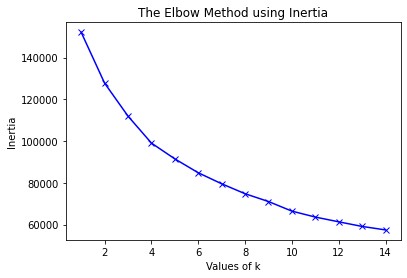

In [ ]:
#finding the k value

from sklearn.cluster import KMeans
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters = i)
  kmean.fit_predict(pd.DataFrame(scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
kmeans_model = KMeans(5)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})],axis = 1)

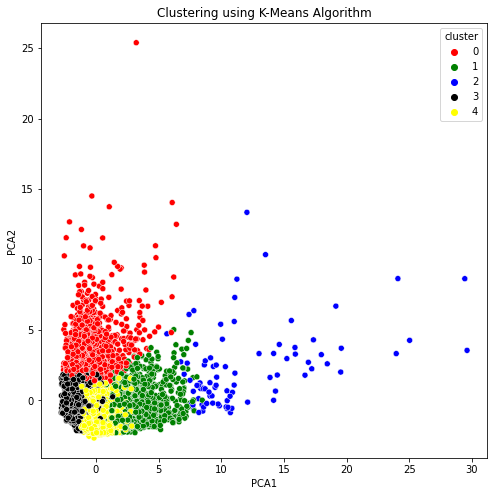

In [ ]:
from seaborn.rcmod import palettes
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data = pca_df_kmeans, palette= ['red', 'green','blue','black','yellow'])

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid')

plt.title("Clustering using K-Means Algorithm")
plt.show()

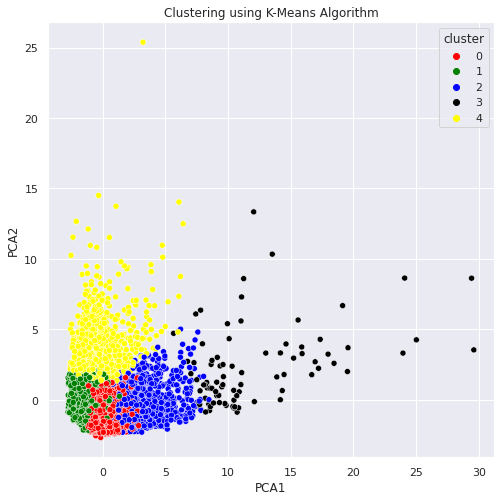

In [ ]:
from seaborn.rcmod import palettes
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data = pca_df_kmeans, palette= ['red', 'green','blue','black','yellow'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})],axis = 1)


In [ ]:
from seaborn.rcmod import palettes
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data = pca_df_kmeans, palette= ['red', 'green','black','yellow'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
kmeans_model = KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})],axis = 1)

In [ ]:
from seaborn.rcmod import palettes
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data = pca_df_kmeans, palette= ['red', 'green','yellow'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv('/content/Ecommerce Customers.csv')

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


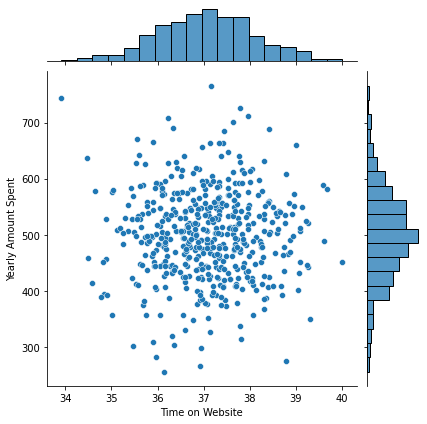

In [ ]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = customers)

In [ ]:
# X = customers[['Avg. Session Length', 'Time on App',
#        'Time on Website', 'Length of Membership']]
X = customers.iloc[:,3:7].values
y = customers.iloc[:,-1].values


In [ ]:


# y= customers['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train )

LinearRegression()

In [ ]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


In [ ]:
predictions = lm.predict(X_test)

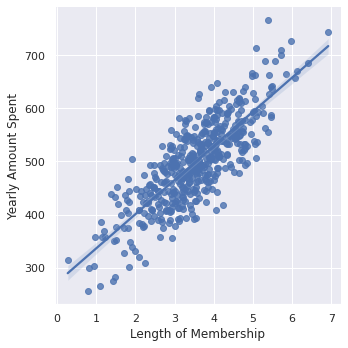

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

Text(0.5, 0, 'Y test')

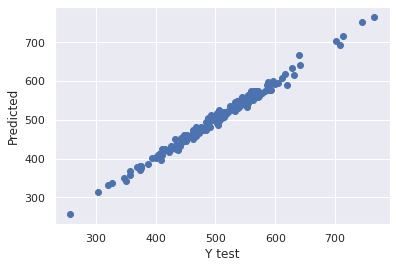

In [ ]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


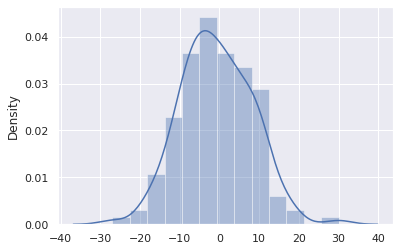

In [ ]:
sns.distplot((y_test-predictions))

Polynomial Plot


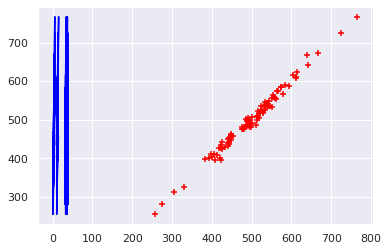

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#fitting the regression model using sklearn
# from sklearn.preprocessing import PolynomialFeatures

# poly_reg = PolynomialFeatures(degree=3)
# X_poly = poly_reg.fit_transform(X_train)

#print(X_poly)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

#accuracy = lr.score(poly_reg.transform(X_test),y_test)
#print("Accuracy",accuracy)

#visualizing the data
print("Polynomial Plot")
predictions = lr.predict(X_test)
plt.scatter(y_test, predictions, color='red',marker='+')
plt.plot(X_test,predictions,color='blue')
#plt.scatter(X_test, y_test, color='red')
#plt.plot(X_test, lr.predict(poly_reg.transform(X_test)))
# plt.xlabel('Month')
# plt.ylabel('Sales')
# plt.xlabel('Sales')
# plt.ylabel('Profit')
plt.show()